In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Define Problem Statement and perform Exploratory Data Analysis

## Definition of problem 

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

• Do some feature engineering to get more insists

• Do Hypothesis test to get the relation between the attributes

• Perform aggregates and build a new and relevant columns

• Take care of categorical and numerical data 




## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [79]:
df.shape

(144867, 24)

In [80]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [81]:
df['trip_creation_time'].astype('datetime64')

0        2018-09-20 02:35:36.476840
1        2018-09-20 02:35:36.476840
2        2018-09-20 02:35:36.476840
3        2018-09-20 02:35:36.476840
4        2018-09-20 02:35:36.476840
                    ...            
144862   2018-09-20 16:24:28.436231
144863   2018-09-20 16:24:28.436231
144864   2018-09-20 16:24:28.436231
144865   2018-09-20 16:24:28.436231
144866   2018-09-20 16:24:28.436231
Name: trip_creation_time, Length: 144867, dtype: datetime64[ns]

In [82]:
df['od_start_time'] = df['od_start_time'].astype('datetime64')
df['od_end_time'] = df['od_end_time'].astype('datetime64')


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  object        
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [84]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [85]:
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144312,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144313,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144314,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


## Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

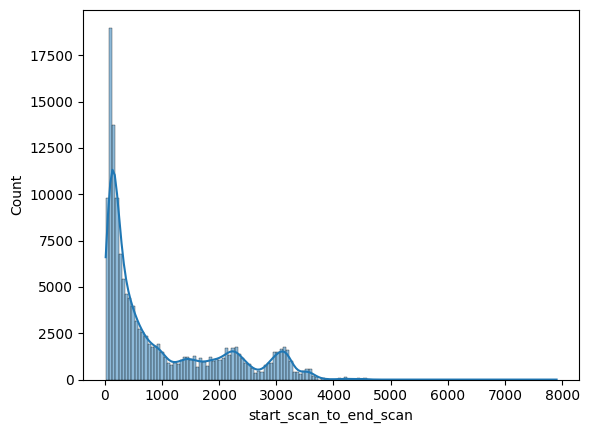

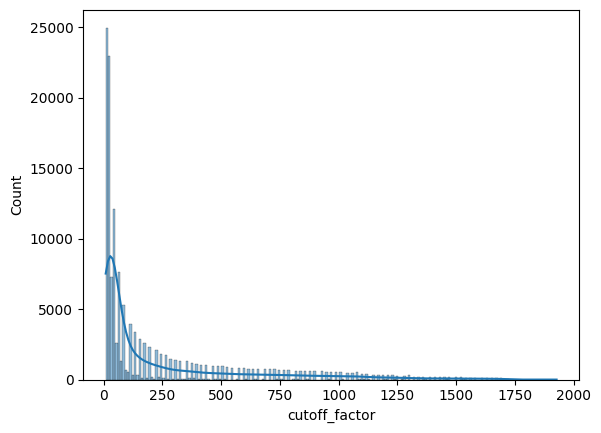

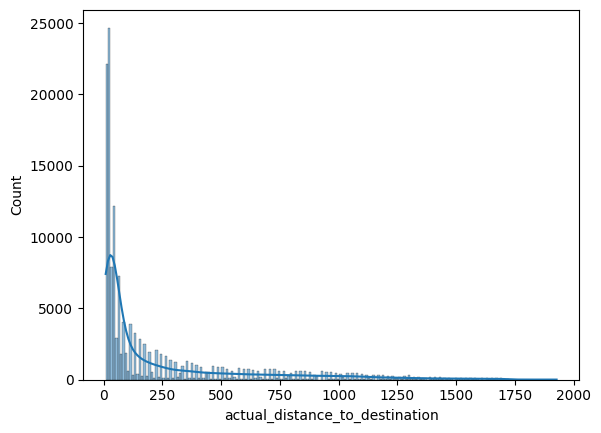

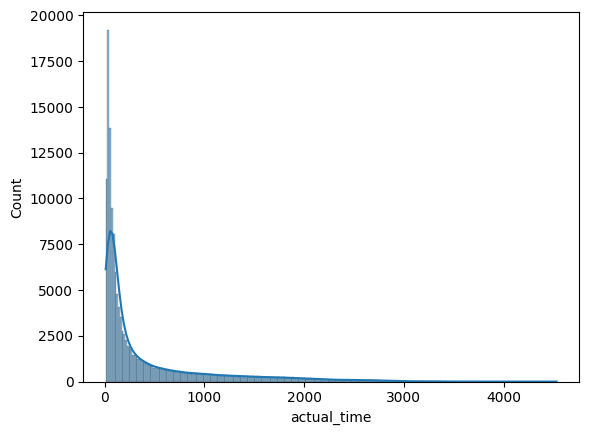

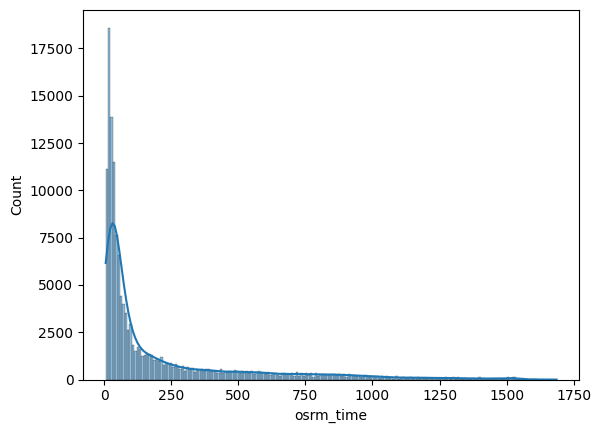

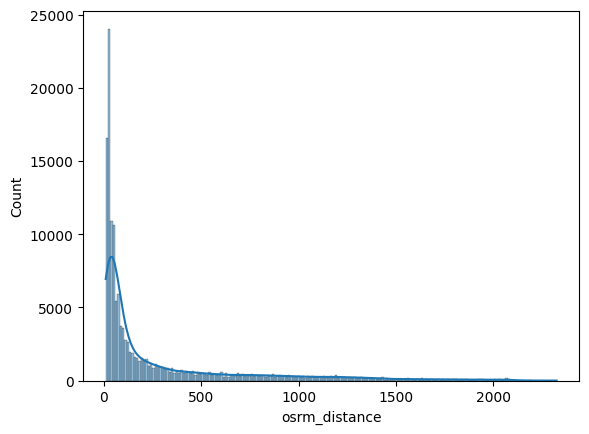

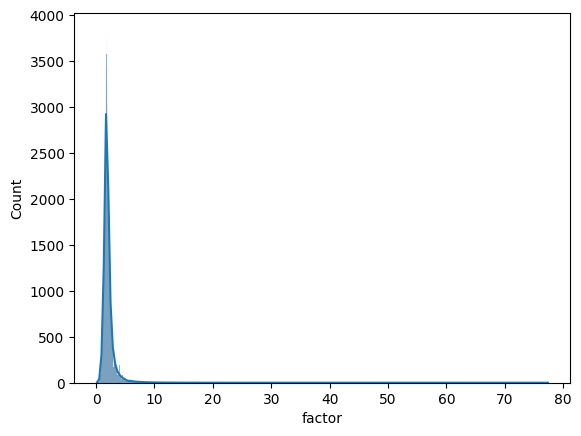

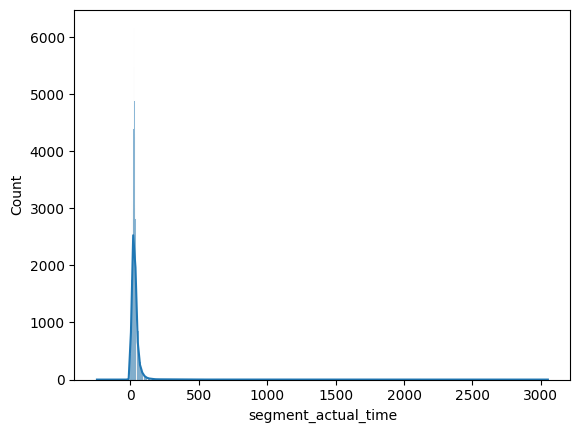

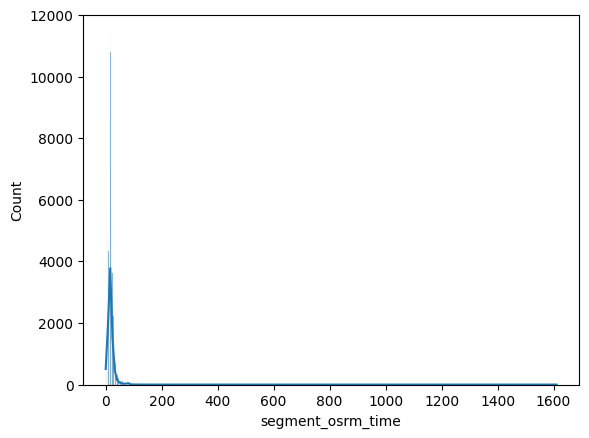

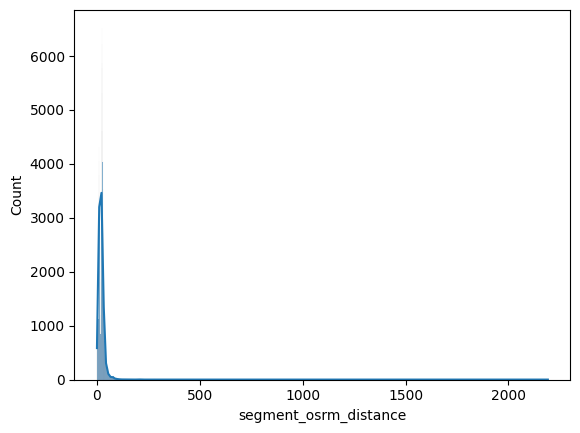

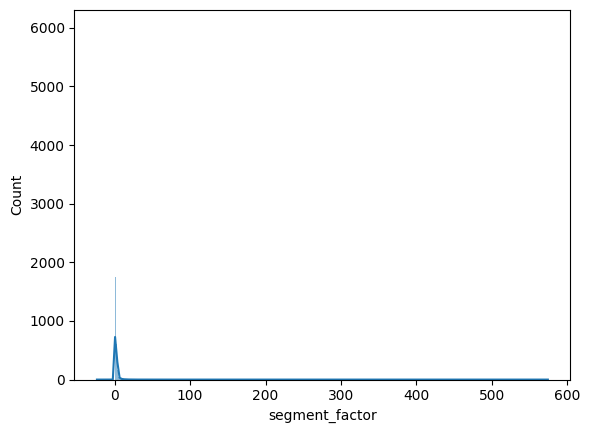

In [86]:


for col in df.columns:
  if df[col].dtype in ("int64", "float64"):
    sns.histplot(df[col], kde = True)
    plt.show()

1. start_scan_to_end_scan, cutoff_factor, actual_distance_to_destination, actual_time, osrm_time, osrm_distance is a kind of right-skew graph
2. factor, segment_actual_time, segment_osrm_time, segment_factor is representing gaussian distribution


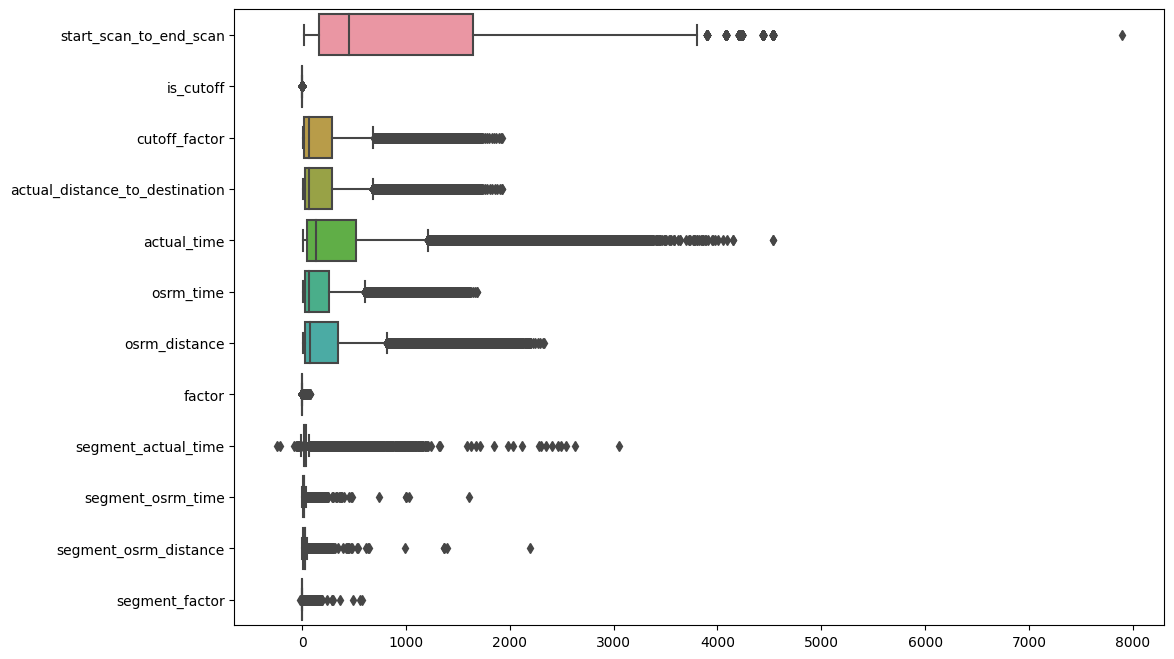

In [87]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, orient='h')
plt.show()

1. cutoff_factor, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_osrm_time these attributes have more outliers as compared to others but as the outliers are countinuos there is least possibility that these are considered as outliers.
2. start_scan_to_end_scan, segment_actual_time, segment_osrm_distance, segemnt_factor these attributes consist of some outliers that can be ignored for better predictions

## Insights based on ED

### Comments on range of attributes, outliers of various attributes

In [88]:
#for non categorical variables

data = []
for att in df.columns:
  if df[att].dtype in ('int64', 'float64'):

    obj = {}

    obj['Attributes'] = att
    obj['Min_Value'] = df[att].min()
    obj['Mean'] = df[att].mean()
    obj['Max_Value'] = df[att].max()

    data.append(obj)

pd.DataFrame(data)

,Attributes,Min_Value,Mean,Max_Value
0,start_scan_to_end_scan,20.000000,963.697698,7898.000000
1,cutoff_factor,9.000000,233.561345,1927.000000
2,actual_distance_to_destination,9.000045,234.708498,1927.447705
3,actual_time,9.000000,417.996237,4532.000000
4,osrm_time,6.000000,214.437055,1686.000000
5,osrm_distance,9.008200,285.549785,2326.199100
6,factor,0.144000,2.120178,77.387097
7,segment_actual_time,-244.000000,36.175379,3051.000000
8,segment_osrm_time,0.000000,18.495697,1611.000000
9,segment_osrm_distance,0.000000,22.818993,2191.403700


### Comments on the distribution of the variables and relationship between them

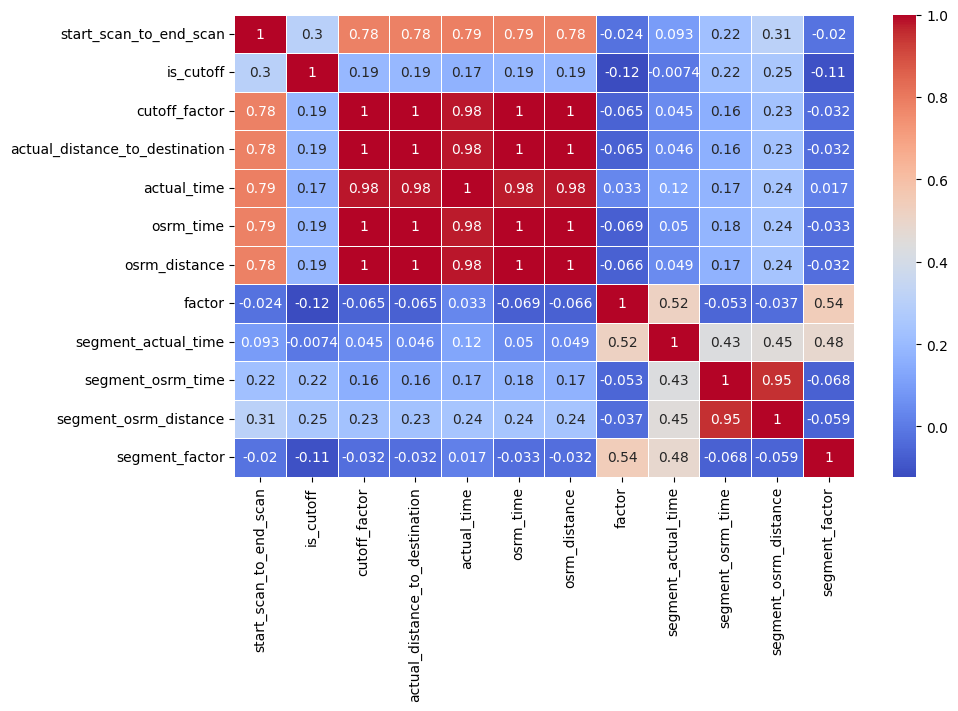

In [89]:
plt.figure(figsize = (10, 6))
sns.heatmap( df.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm')
plt.show()

1. startscan_to_end_scan, cutoff_factor, actua_distance_to_destination, actual_time, osrm_time, osrm_distance these attributes has high correlation with each other
2. segment_osrm_time, segment_osrm_distance these attributes has high correlation with each other
3. factor, segment_actual_time, segment_factor these attributes has high correlation with each other

### Comments for each univariate and bivariate plot

The comments on plots has been provided below

# Feature Creation

In [90]:
df['src_city'] = df['source_name'].str.split(" ").str.get(0)
df['src_state'] = df['source_name'].str.split(" ").str.get(1)

In [91]:
df['dest_city'] = df['destination_name'].str.split(" ").str.get(0)
df['dest_state'] = df['destination_name'].str.split(" ").str.get(1)


In [92]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,src_city,src_state,dest_city,dest_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat)
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat)
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat)
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat)
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat)


In [93]:
df['time_taken'] = df['od_end_time'] - df['od_start_time']
df['time_taken']

0        0 days 01:26:12.818197
1        0 days 01:26:12.818197
2        0 days 01:26:12.818197
3        0 days 01:26:12.818197
4        0 days 01:26:12.818197
                  ...          
144862   0 days 07:07:41.181838
144863   0 days 07:07:41.181838
144864   0 days 07:07:41.181838
144865   0 days 07:07:41.181838
144866   0 days 07:07:41.181838
Name: time_taken, Length: 144316, dtype: timedelta64[ns]

In [94]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'src_city', 'src_state', 'dest_city', 'dest_state', 'time_taken'],
      dtype='object')

# Merging of rows and aggregation of fields

**Merging rows to get actual_time aggregated value and OSRM time aggregated value**

In [95]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "actual_time", 'osrm_time']]

In [96]:
df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['actual_time', 'osrm_time']].aggregate(
    rev_actual_time = ("actual_time", 'max'),
    rev_osrm_time = ("osrm_time", 'max')
)

df_new

rev_actual_time  \
trip_uuid               source_name                           destination_name                                         
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)               830.0   
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                    732.0   
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)                 47.0   
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)                 96.0   
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                   2736.0   
...                                                                                                              ...   
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)                 33.0   
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)             51.0   
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                      60.0   
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                     42.0   
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                           233.0   

                                                                                                     rev_osrm_time  
trip_uuid               source_name                           destination_name                                      
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)             394.0  
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                  349.0  
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)               26.0  
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)               42.0  
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                 1529.0  
...                                                                                                            ...  
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)               31.0  
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)           41.0  
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                    50.0  
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                   26.0  
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                          42.0  

[26222 rows x 2 columns]

In [97]:
df_updated = df_new.groupby('trip_uuid')[['rev_actual_time', 'rev_osrm_time']].aggregate(
    up_actual_time = ('rev_actual_time', 'sum'),
    up_osrm_time = ('rev_osrm_time', 'sum')
)

df_updated

,up_actual_time,up_osrm_time
trip_uuid,,
trip-153671041653548748,1562.0,743.0
trip-153671042288605164,143.0,68.0
trip-153671043369099517,3347.0,1741.0
trip-153671046011330457,59.0,15.0
trip-153671052974046625,341.0,117.0
...,...,...
trip-153861095625827784,83.0,62.0
trip-153861104386292051,21.0,12.0
trip-153861106442901555,282.0,54.0


**Merging rows to get actual_time aggregated value and segment actual time aggregated value**

In [98]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "actual_time", 'segment_actual_time']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['actual_time', 'segment_actual_time']].aggregate(
    rev_actual_time = ("actual_time", 'max'),
    rev_segment_actual_time = ("segment_actual_time", 'max')
)

df_new

rev_actual_time  \
trip_uuid               source_name                           destination_name                                         
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)               830.0   
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                    732.0   
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)                 47.0   
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)                 96.0   
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                   2736.0   
...                                                                                                              ...   
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)                 33.0   
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)             51.0   
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                      60.0   
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                     42.0   
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                           233.0   

                                                                                                     rev_segment_actual_time  
trip_uuid               source_name                           destination_name                                                
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)                        91.0  
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                            151.0  
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)                         18.0  
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)                         22.0  
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                             84.0  
...                                                                                                                      ...  
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)                         17.0  
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)                     18.0  
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                              18.0  
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                             30.0  
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                                   188.0  

[26222 rows x 2 columns]

In [99]:
df_updated = df_new.groupby('trip_uuid')[['rev_actual_time', 'rev_segment_actual_time']].aggregate(
    up_actual_time = ('rev_actual_time', 'sum'),
    up_segment_actual_time = ('rev_segment_actual_time', 'sum')
)

df_updated

,up_actual_time,up_segment_actual_time
trip_uuid,,
trip-153671041653548748,1562.0,242.0
trip-153671042288605164,143.0,40.0
trip-153671043369099517,3347.0,359.0
trip-153671046011330457,59.0,36.0
trip-153671052974046625,341.0,172.0
...,...,...
trip-153861095625827784,83.0,26.0
trip-153861104386292051,21.0,12.0
trip-153861106442901555,282.0,178.0


**Merging rows to get distance aggregated value and segment osrm distance aggregated value**

In [100]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "osrm_distance", 'segment_osrm_distance']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['osrm_distance', 'segment_osrm_distance']].aggregate(
    rev_osrm_distance = ("osrm_distance", 'max'),
    rev_segment_osrm_distance = ("segment_osrm_distance", 'max')
)

df_new

rev_osrm_distance  \
trip_uuid               source_name                           destination_name                                           
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)              544.8027   
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                   446.5496   
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)                28.1994   
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)                56.9116   
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                  2090.8743   
...                                                                                                                ...   
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)                25.7087   
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)            42.5213   
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                     52.8070   
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                    28.0484   
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                           52.5303   

                                                                                                     rev_segment_osrm_distance  
trip_uuid               source_name                           destination_name                                                  
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)                       73.8647  
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                           101.3602  
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)                        10.8633  
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)                        12.2746  
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                            75.3226  
...                                                                                                                        ...  
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)                        15.8574  
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)                    13.3398  
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                             21.2168  
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                            23.2367  
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                                   28.5437  

[26222 rows x 2 columns]

In [101]:
df_updated = df_new.groupby('trip_uuid')[['rev_osrm_distance', 'rev_segment_osrm_distance']].aggregate(
    up_osrm_distance = ('rev_osrm_distance', 'sum'),
    up_segment_osrm_distance = ('rev_segment_osrm_distance', 'sum')
)

df_updated

,up_osrm_distance,up_segment_osrm_distance
trip_uuid,,
trip-153671041653548748,991.3523,175.2249
trip-153671042288605164,85.1110,23.1379
trip-153671043369099517,2372.0852,111.4543
trip-153671046011330457,19.6800,11.9675
trip-153671052974046625,146.7918,76.5350
...,...,...
trip-153861095625827784,73.4630,21.0438
trip-153861104386292051,16.0882,10.4451
trip-153861106442901555,63.2841,58.4387


**Merging rows to get osrm time aggregated value and segment osrm time aggregated value**

In [102]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "osrm_time", 'segment_osrm_time']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['osrm_time', 'segment_osrm_time']].aggregate(
    rev_osrm_time = ("osrm_time", 'max'),
    rev_segment_osrm_time = ("segment_osrm_time", 'max')
)

df_new

rev_osrm_time  \
trip_uuid               source_name                           destination_name                                       
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)             394.0   
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                  349.0   
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)               26.0   
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)               42.0   
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                 1529.0   
...                                                                                                            ...   
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)               31.0   
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)           41.0   
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                    50.0   
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                   26.0   
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                          42.0   

                                                                                                     rev_segment_osrm_time  
trip_uuid               source_name                           destination_name                                              
trip-153671041653548748 Bhopal_Trnsport_H (Madhya Pradesh)    Kanpur_Central_H_6 (Uttar Pradesh)                      52.0  
                        Kanpur_Central_H_6 (Uttar Pradesh)    Gurgaon_Bilaspur_HB (Haryana)                           81.0  
trip-153671042288605164 Doddablpur_ChikaDPP_D (Karnataka)     Chikblapur_ShntiSgr_D (Karnataka)                       10.0  
                        Tumkur_Veersagr_I (Karnataka)         Doddablpur_ChikaDPP_D (Karnataka)                        9.0  
trip-153671043369099517 Bangalore_Nelmngla_H (Karnataka)      Gurgaon_Bilaspur_HB (Haryana)                           85.0  
...                                                                                                                    ...  
trip-153861115439069069 Thisayanvilai_UdnkdiRD_D (Tamil Nadu) Peikulam_SriVnktpm_D (Tamil Nadu)                       18.0  
                        Tirchchndr_Shnmgprm_D (Tamil Nadu)    Thisayanvilai_UdnkdiRD_D (Tamil Nadu)                   13.0  
                        Tirunelveli_VdkkuSrt_I (Tamil Nadu)   Eral_Busstand_D (Tamil Nadu)                            18.0  
trip-153861118270144424 Hospet (Karnataka)                    Sandur_WrdN1DPP_D (Karnataka)                           21.0  
                        Sandur_WrdN1DPP_D (Karnataka)         Bellary_Dc (Karnataka)                                  25.0  

[26222 rows x 2 columns]

In [103]:
df_updated = df_new.groupby('trip_uuid')[['rev_osrm_time', 'rev_segment_osrm_time']].aggregate(
    up_osrm_time = ('rev_osrm_time', 'sum'),
    up_segment_osrm_time = ('rev_segment_osrm_time', 'sum')
)

df_updated

,up_osrm_time,up_segment_osrm_time
trip_uuid,,
trip-153671041653548748,743.0,133.0
trip-153671042288605164,68.0,19.0
trip-153671043369099517,1741.0,113.0
trip-153671046011330457,15.0,9.0
trip-153671052974046625,117.0,64.0
...,...,...
trip-153861095625827784,62.0,23.0
trip-153861104386292051,12.0,7.0
trip-153861106442901555,54.0,48.0


# Comparison & Visualization of time and distance fields

In [104]:
time = []; dis = []

for col in df.columns:
  if "time" in col:
    time.append(col)
  elif "distance" in col:
    dis.append(col)

print(time)
print(dis)


['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'time_taken']
['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']


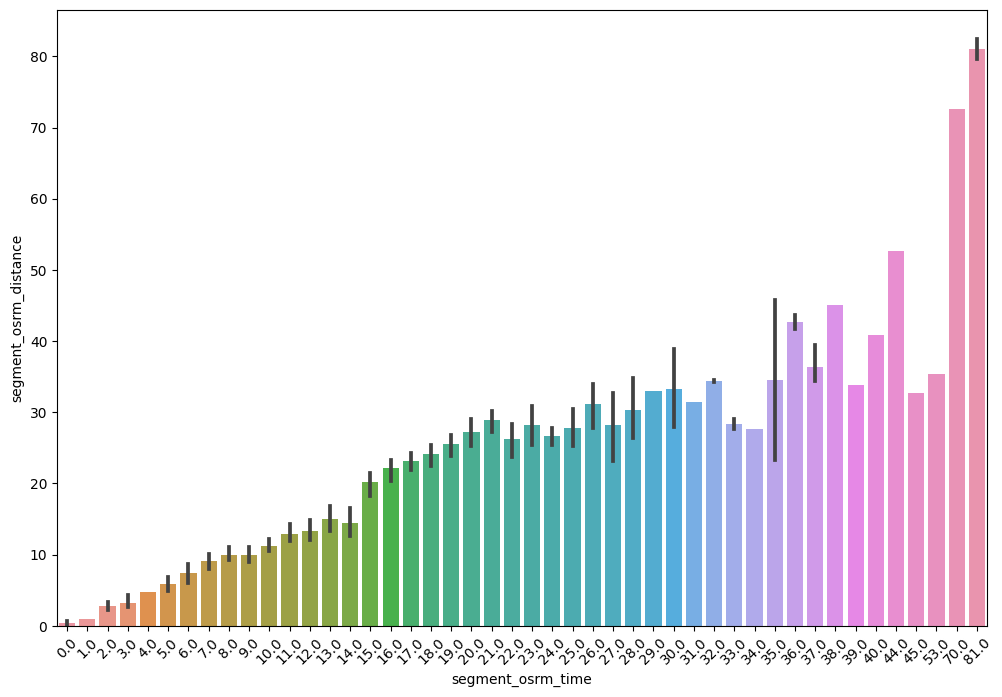

In [105]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df[:300], x = "segment_osrm_time", y = "segment_osrm_distance")
plt.xticks(rotation = 45)
plt.show()


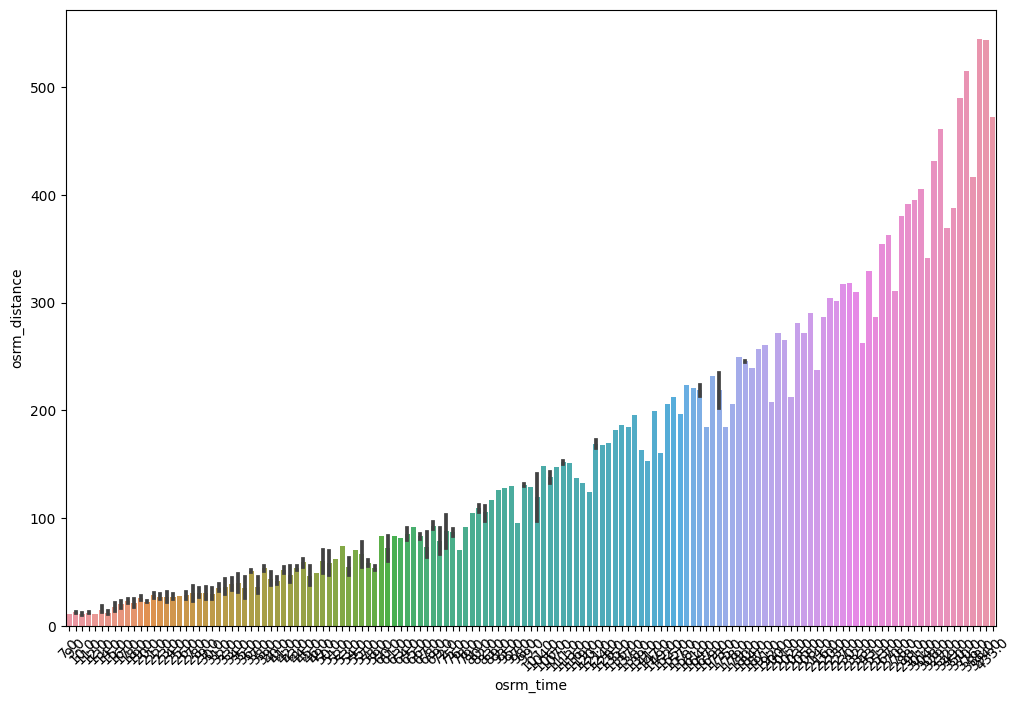

In [106]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df[:300], x = "osrm_time", y = "osrm_distance")
plt.xticks(rotation = 45)
plt.show()

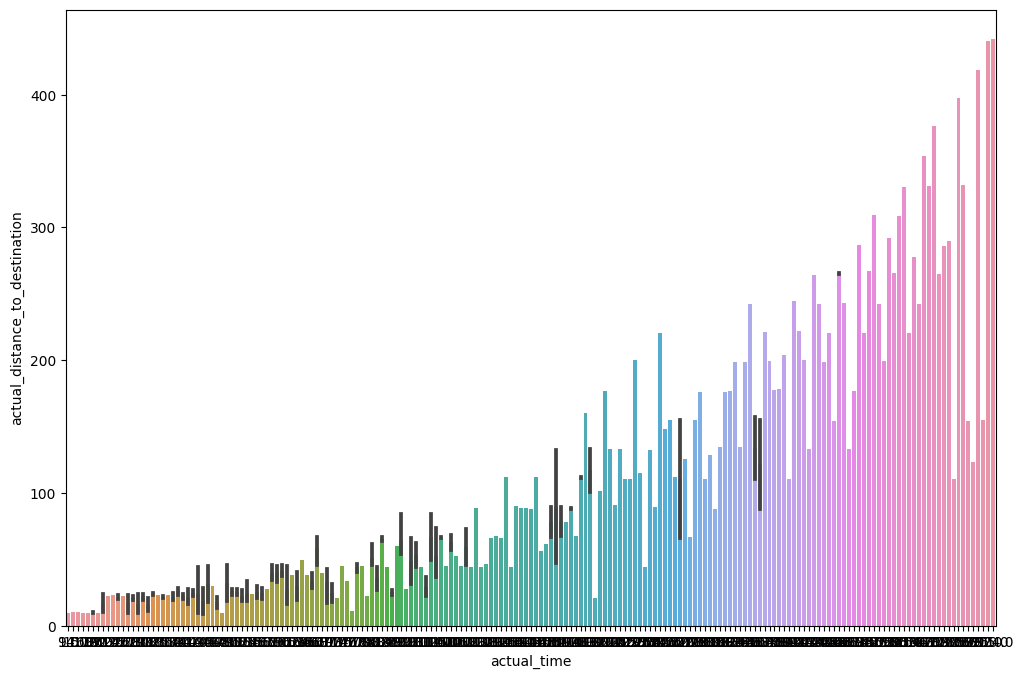

In [107]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df[:300], x = "actual_time", y = "actual_distance_to_destination")
plt.show()

# Missing values Treatment & Outlier treatment

missing values in the dataset has been drop so their are no missing values

In [108]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
src_city                          0
src_state                         0
dest_city                         0
dest_state                  

In [109]:
outliers = []

for col in df.columns:
  if df[col].dtype in ('int64', 'float64'):
    obj = {}

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    obj['Attributes'] = col
    obj["lower"] = lower
    obj['upper'] = upper

    outliers.append(obj)

outliers = pd.DataFrame(outliers)

outliers


,Attributes,lower,upper
0,start_scan_to_end_scan,-2065.000000,3871.000000
1,cutoff_factor,-374.000000,682.000000
2,actual_distance_to_destination,-371.998873,682.270194
3,actual_time,-646.500000,1213.500000
4,osrm_time,-321.000000,607.000000
5,osrm_distance,-444.717475,820.919125
6,factor,0.692943,3.123883
7,segment_actual_time,-10.000000,70.000000
8,segment_osrm_time,-5.500000,38.500000
9,segment_osrm_distance,-11.585050,51.452350


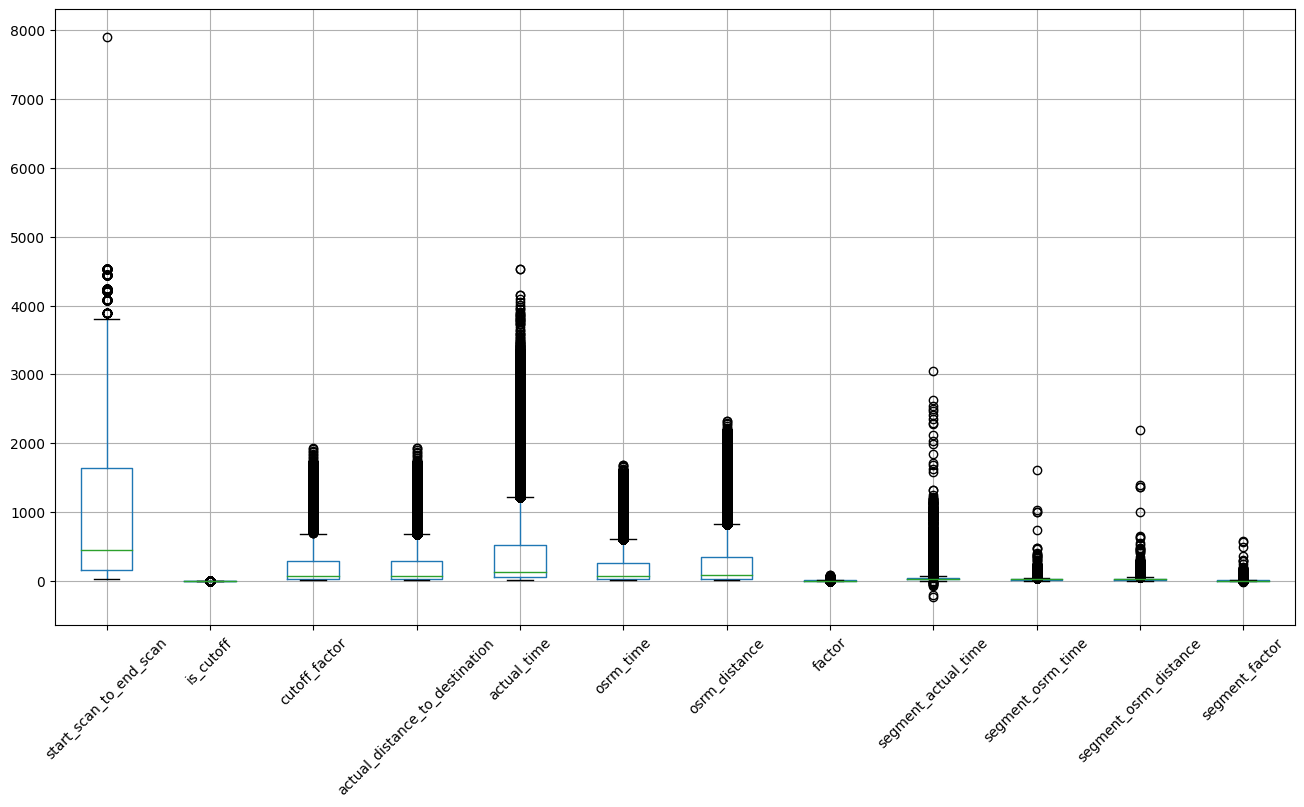

In [110]:
plt.figure(figsize = (16, 8))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [134]:
#outliers are been removed from the data set

for col in df.columns:
  if df[col].dtype in ("float64", "int64"):
    l = outliers[outliers["Attributes"] == col]['lower'].max()
    r = outliers[outliers["Attributes"] == col]['upper'].max()
    df = df[~((df[col] < l) & (df[col] > r))]
    

In [112]:
df.shape

(144316, 29)

# Checking relationship between aggregated fields

**comparison and visualization of actual_time aggregated value and OSRM time aggregated value**

<Axes: ylabel='Count'>

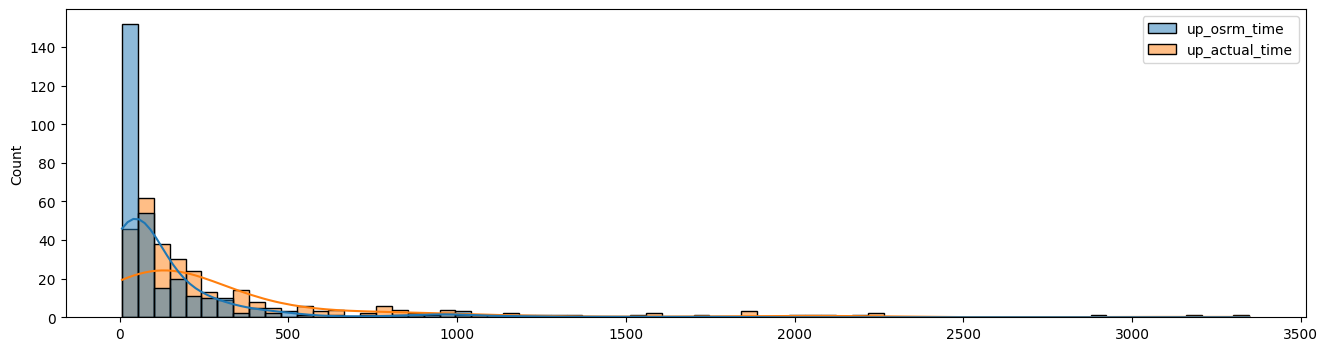

In [113]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "actual_time", 'osrm_time']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['actual_time', 'osrm_time']].aggregate(
    rev_actual_time = ("actual_time", 'max'),
    rev_osrm_time = ("osrm_time", 'max')
)

df_updated = df_new.groupby('trip_uuid')[['rev_actual_time', 'rev_osrm_time']].aggregate(
    up_actual_time = ('rev_actual_time', 'sum'),
    up_osrm_time = ('rev_osrm_time', 'sum')
)


plt.figure(figsize = (16, 4))
sns.histplot(df_updated[['up_osrm_time', 'up_actual_time']][:300], kde = True)

$H_0:$ The average mean of actual_time aggregated value and OSRM time aggregated value are same.

$H_a:$ The average mean of actual_time aggregated value and OSRM time aggregated value are not same.

Let $\mu_1$ and $\mu_2$ be the average of actual_time and average of OSRM time respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 != \mu_2$

In [114]:
from scipy.stats import ttest_rel

t_test, p = ttest_rel(df_updated['up_actual_time'][:3000], df_updated['up_osrm_time'][:3000])

print(p)
if p < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

3.2574425066728143e-236
Reject H0


**comparison and visualization of actual_time aggregated value and segment actual time aggregated value**

<Axes: ylabel='Count'>

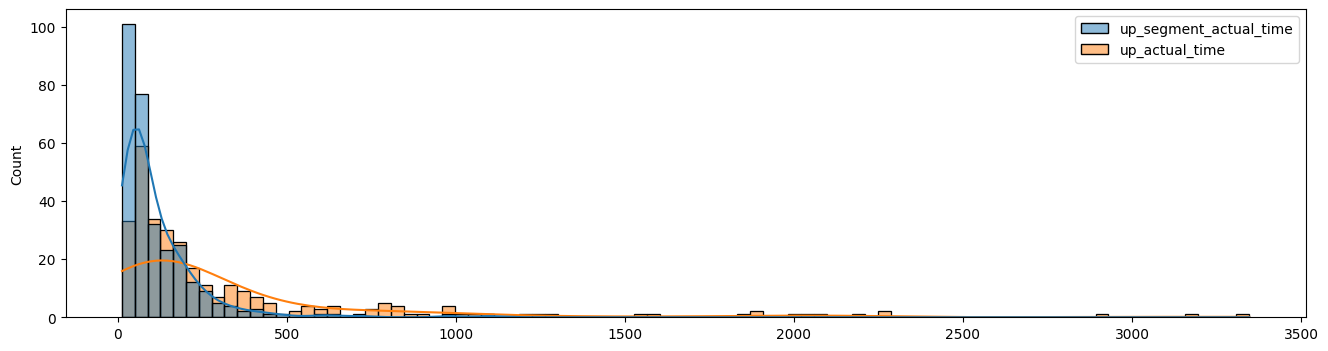

In [115]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "actual_time", 'segment_actual_time']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['actual_time', 'segment_actual_time']].aggregate(
    rev_actual_time = ("actual_time", 'max'),
    rev_segment_actual_time = ("segment_actual_time", 'max')
)

df_updated = df_new.groupby('trip_uuid')[['rev_actual_time', 'rev_segment_actual_time']].aggregate(
    up_actual_time = ('rev_actual_time', 'sum'),
    up_segment_actual_time = ('rev_segment_actual_time', 'sum')
)

plt.figure(figsize = (16, 4))
sns.histplot(df_updated[['up_segment_actual_time', 'up_actual_time']][:300], kde = True)

$H_0:$ The average of actual_time aggregated value and segment actual time aggregated value are same.

$H_a:$ The average of actual_time aggregated value and segment actual time aggregated value are not same.

Let $\mu_1$ and $\mu_2$ be the average of actual_time and average of segment actual time respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 != \mu_2$

In [116]:
from scipy.stats import ttest_rel

t_test, p = ttest_rel(df_updated['up_actual_time'][:3000], df_updated['up_segment_actual_time'][:3000])

print(p)
if p < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

3.609478597293128e-142
Reject H0


**comparison and visualization of osrm distance aggregated value and segment osrm distance aggregated value**

<Axes: ylabel='Count'>

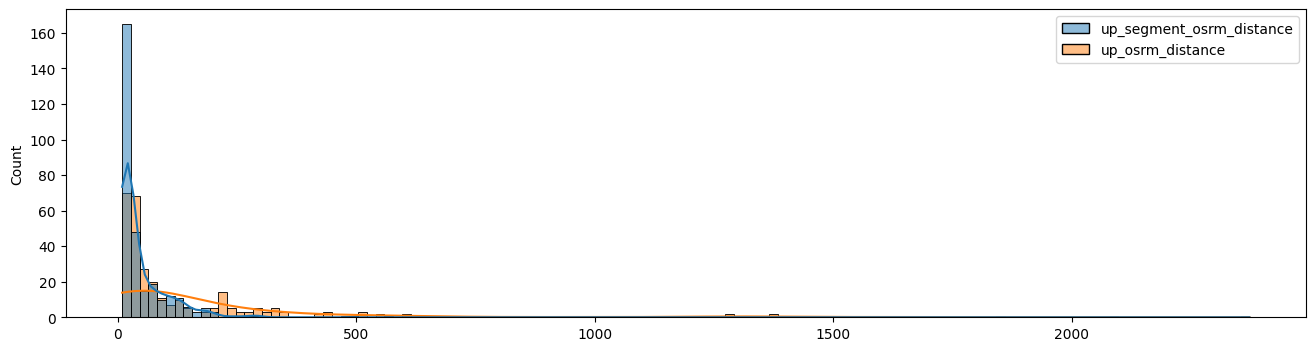

In [117]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "osrm_distance", 'segment_osrm_distance']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['osrm_distance', 'segment_osrm_distance']].aggregate(
    rev_osrm_distance = ("osrm_distance", 'max'),
    rev_segment_osrm_distance = ("segment_osrm_distance", 'max')
)

df_updated = df_new.groupby('trip_uuid')[['rev_osrm_distance', 'rev_segment_osrm_distance']].aggregate(
    up_osrm_distance = ('rev_osrm_distance', 'sum'),
    up_segment_osrm_distance = ('rev_segment_osrm_distance', 'sum')
)

plt.figure(figsize = (16, 4))
sns.histplot(df_updated[['up_segment_osrm_distance', 'up_osrm_distance']][:300], kde = True)


$H_0:$ The average of osrm distance aggregated value and segment osrm distance aggregated value are same.

$H_a:$ The average of osrm distance aggregated value and segment osrm distance aggregated value are not same.

Let $\mu_1$ and $\mu_2$ be the average of osrm distance and average of segment osrm distance respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 != \mu_2$

In [118]:
from scipy.stats import ttest_rel

t_test, p = ttest_rel(df_updated['up_osrm_distance'][:3000], df_updated['up_segment_osrm_distance'][:3000])

print(p)
if p < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

1.439458507545314e-122
Reject H0


**comparison and visualization of osrm time aggregated value and segment osrm time aggregated value**

<Axes: ylabel='Count'>

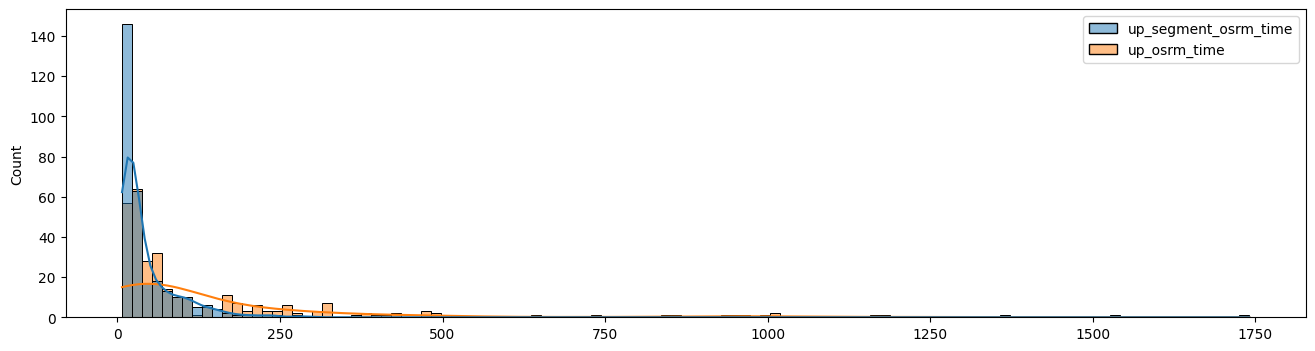

In [119]:
dummy = df[["trip_uuid", 'source_name', "destination_name", "osrm_time", 'segment_osrm_time']]

df_new = dummy.groupby(["trip_uuid", 'source_name', 'destination_name'])[['osrm_time', 'segment_osrm_time']].aggregate(
    rev_osrm_time = ("osrm_time", 'max'),
    rev_segment_osrm_time = ("segment_osrm_time", 'max')
)

df_updated = df_new.groupby('trip_uuid')[['rev_osrm_time', 'rev_segment_osrm_time']].aggregate(
    up_osrm_time = ('rev_osrm_time', 'sum'),
    up_segment_osrm_time = ('rev_segment_osrm_time', 'sum')
)

plt.figure(figsize = (16, 4))
sns.histplot(df_updated[['up_segment_osrm_time', 'up_osrm_time']][:300], kde = True)

$H_0:$ The average of osrm time aggregated value and segment osrm time aggregated value are same.

$H_a:$ The average of osrm time aggregated value and segment osrm time aggregated value are not same.

Let $\mu_1$ and $\mu_2$ be the average of osrm time and average of segment osrm time respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 != \mu_2$

In [120]:
from scipy.stats import ttest_rel

t_test, p = ttest_rel(df_updated['up_osrm_time'][:3000], df_updated['up_segment_osrm_time'][:3000])

print(p)
if p < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

9.599405188478875e-133
Reject H0


# Handling categorical values

In [121]:
df.describe(include = 'object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,cutoff_timestamp,src_city,src_state,dest_city,dest_state
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,14787,1497,2,14787,1496,1496,1466,1466,92894,1491,53,1462,52
top,training,2018-10-01 05:04:55.268931,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-24 05:19:20,Gurgaon_Bilaspur_HB,(Haryana),Gurgaon_Bilaspur_HB,(Karnataka)
freq,104632,101,1812,99132,101,23267,23267,15192,15192,39,23267,27408,15192,20687


**Only route_type and data are converted to encoders using OneHotEncoder**

In [122]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df = df.join(pd.DataFrame(ohe.fit_transform(df[['route_type']]).toarray(), columns = df['route_type'].unique()))


In [123]:
df = df.drop(['route_type'], axis = 1)

In [124]:
df['Carting'].dtype

dtype('float64')

In [125]:
ohe = OneHotEncoder()
for col in df.columns:
  if df[col].dtype == 'object' and df[col].nunique() < 4:
    print(col)
    df = df.join(pd.DataFrame(ohe.fit_transform(df[[col]]).toarray(), columns = df[col].unique()))
    df = df.drop([col], axis = 1)

df

data


,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_factor,src_city,src_state,dest_city,dest_state,time_taken,Carting,FTL,training,test
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,1.272727,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat),0 days 01:26:12.818197,1.0,0.0,0.0,1.0
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,1.111111,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat),0 days 01:26:12.818197,1.0,0.0,0.0,1.0
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,2.285714,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat),0 days 01:26:12.818197,1.0,0.0,0.0,1.0
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,1.750000,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat),0 days 01:26:12.818197,1.0,0.0,0.0,1.0
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,1.200000,Anand_VUNagar_DC,(Gujarat),Khambhat_MotvdDPP_D,(Gujarat),0 days 01:26:12.818197,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,1.000000,Sonipat_Kundli_H,(Haryana),Gurgaon_Bilaspur_HB,(Haryana),0 days 07:07:41.181838,NaN,NaN,NaN,NaN
144863,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,1.238095,Sonipat_Kundli_H,(Haryana),Gurgaon_Bilaspur_HB,(Haryana),0 days 07:07:41.181838,NaN,NaN,NaN,NaN
144864,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,0.588235,Sonipat_Kundli_H,(Haryana),Gurgaon_Bilaspur_HB,(Haryana),0 days 07:07:41.181838,NaN,NaN,NaN,NaN
144865,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,0.629630,Sonipat_Kundli_H,(Haryana),Gurgaon_Bilaspur_HB,(Haryana),0 days 07:07:41.181838,NaN,NaN,NaN,NaN


# Column Normalization /Column Standardization

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
df["trip_creation_time"] = df["trip_creation_time"].astype('datetime64')

In [128]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time','segment_osrm_distance',
           'segment_osrm_time']

In [129]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   start_scan_to_end_scan          144316 non-null  float64
 1   actual_distance_to_destination  144316 non-null  float64
 2   actual_time                     144316 non-null  float64
 3   osrm_time                       144316 non-null  float64
 4   osrm_distance                   144316 non-null  float64
 5   segment_actual_time             144316 non-null  float64
 6   segment_osrm_distance           144316 non-null  float64
 7   segment_osrm_time               144316 non-null  float64
dtypes: float64(8)
memory usage: 13.9 MB


In [130]:
scaler = StandardScaler()
scaler.fit(df[num_cols])
StandardScaler()
df[num_cols] = scaler.transform(df[num_cols])

# Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it.

## Check from where most orders are coming from

In [131]:
df['dest_city'].value_counts()

Gurgaon_Bilaspur_HB      15192
Bangalore_Nelmngla_H     11019
Bhiwandi_Mankoli_HB       5492
Hyderabad_Shamshbd_H      5142
Kolkata_Dankuni_HB        4892
                         ...  
Vijayawada                   1
Hanskhali_Central_D_1        1
Bhadohi_Rajpura_D            1
Mumbai_Skynet_INT            1
Falna_SbhRDDPP_D             1
Name: dest_city, Length: 1462, dtype: int64

**From Gurgaon_Bilaspur_HB city more orders are coming**
__________________________________________________________________________________

In [132]:
df['dest_state'].value_counts()

(Karnataka)       20687
(Haryana)         20602
(Maharashtra)     17268
(West              8311
(Telangana)        8200
(Tamil             8058
(Uttar             7466
(Gujarat)          6714
(Rajasthan)        6253
(Andhra            6248
(Delhi)            5745
(Punjab)           5105
(Bihar)            4230
(Madhya            4229
(Orissa)           3234
(Jharkhand)        2552
(Kerala)           2230
(Assam)            2000
(Uttarakhand)       893
Hub                 596
(Goa)               557
(Himachal           553
(Chandigarh)        389
Layout              358
02_DPC              280
(Chhattisgarh)      229
(Arunachal          211
(Jammu              201
(Pondicherry)       154
Vadgaon             130
Alipore_DPC          99
Avenue_DPC           89
Pashan               73
Rahatani             66
MP                   49
West                 45
(Meghalaya)          37
(Dadra               34
(Mizoram)            31
Goa                  23
Nagar_DC             18
Nagar           

**From state Karnataka more orders are coming**
_______________

## Busiest corridor, avg distance between them, avg time taken

In [133]:
df[df['actual_distance_to_destination'] == df['actual_distance_to_destination'].max()][["time_taken", "destination_name", "actual_time"]]

,time_taken,destination_name,actual_time
61088,2 days 15:22:06.369411,Bangalore_Nelmngla_H (Karnataka),5.619954


# Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.

North, South and West Zones comidors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.

From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.